In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller as adf
from statsmodels.stats.diagnostic import acorr_ljungbox as lbp

In [22]:
pd.set_option("display.max_rows", 30)

In [23]:
#newMold = pd.read_csv("NewMoldFactEndInfo.csv")
#enMold = pd.read_csv("EnMoldMaintain.csv",low_memory=False)
newMold = pd.read_csv("newmold.csv")
enMold = pd.read_csv("enmold.csv",low_memory=False)
enMold = enMold[["FINISH_DATE_FACT","MOLD_NO"]]
#清理实际日期为null的值
newMold = newMold.dropna()
enMold = enMold.dropna()

In [24]:
newMold.FACT_END_DATE = pd.to_datetime(newMold["FACT_END_DATE"])
enMold.FINISH_DATE_FACT = pd.to_datetime(enMold["FINISH_DATE_FACT"])

In [ ]:
#p.groupby(["FACT_END_DATE"]).agg({"MOLD_NO":sum})

In [25]:
newMold = newMold.groupby([pd.Grouper(freq = "M", key="FACT_END_DATE"),"COMMAND_NAME"]).count().reset_index()
enMold = enMold.groupby([pd.Grouper(freq = "M", key="FINISH_DATE_FACT")]).count().reset_index()

In [26]:
enMold

,FINISH_DATE_FACT,MOLD_NO
0,2008-11-30,190
1,2008-12-31,1775
2,2009-01-31,1148
3,2009-02-28,1851
4,2009-03-31,2444
...,...,...
163,2022-06-30,551
164,2022-07-31,514
165,2022-08-31,761
166,2022-09-30,625


In [27]:
newMold

,FACT_END_DATE,COMMAND_NAME,MOLD_NO,TOOLING_TYPE
0,2010-06-30,注塑模具,1,1
1,2010-08-31,注塑模具,1,1
2,2011-02-28,注塑模具,1,1
3,2011-08-31,注塑模具,1,1
4,2011-09-30,注塑模具,1,1
...,...,...,...,...
526,2022-10-31,压铸模具,5,5
527,2022-10-31,检治具,99,99
528,2022-10-31,治具模具\r\n,40,40
529,2022-10-31,注塑模具,11,11


In [28]:
p = newMold
q = enMold

p = p.groupby(["FACT_END_DATE"]).agg({"MOLD_NO":sum}).reset_index()
#model_sets = newMold[["COMMAND_NAME"]].drop_duplicates()
p = p.rename(columns={"FACT_END_DATE":"ds","MOLD_NO":"y"})
q = q.rename(columns={"FINISH_DATE_FACT":"ds","MOLD_NO":"y"})

In [19]:
p

,ds,y
0,2010-06-30,1
1,2010-08-31,1
2,2011-02-28,1
3,2011-08-31,1
4,2011-09-30,1
...,...,...
99,2022-06-30,585
100,2022-07-31,781
101,2022-08-31,548
102,2022-09-30,536


In [20]:
q

,ds,y
0,2008-11-30,190
1,2008-12-31,1775
2,2009-01-31,1148
3,2009-02-28,1851
4,2009-03-31,2444
...,...,...
163,2022-06-30,551
164,2022-07-31,514
165,2022-08-31,761
166,2022-09-30,625


In [32]:
p[22:-1]

,ds,y
22,2016-01-31,7
23,2016-02-29,11
24,2016-03-31,41
25,2016-04-30,15
26,2016-05-31,125
...,...,...
97,2022-04-30,650
98,2022-05-31,639
99,2022-06-30,585
100,2022-07-31,781


In [33]:
q[86:-1]

,ds,y
86,2016-01-31,1391
87,2016-02-29,739
88,2016-03-31,1332
89,2016-04-30,1305
90,2016-05-31,1445
...,...,...
161,2022-04-30,694
162,2022-05-31,575
163,2022-06-30,551
164,2022-07-31,514


In [29]:
#新模产量
p[22:-1].to_csv("NewMold_real.csv",index=None,header=True)
#修模产量
q[86:-1].to_csv("FixMold_real.csv",index=None,header=True)

## 测试

In [27]:
#机器学习部分

In [35]:
train_dataset_newMold = p[22:-1]
train_dataset_fixMold = q[86:-1]

In [36]:
train_dataset_newMold

,ds,y
22,2016-01-31,7
23,2016-02-29,11
24,2016-03-31,41
25,2016-04-30,15
26,2016-05-31,125
...,...,...
97,2022-04-30,650
98,2022-05-31,639
99,2022-06-30,585
100,2022-07-31,781


In [ ]:
!pip install neuralprophet

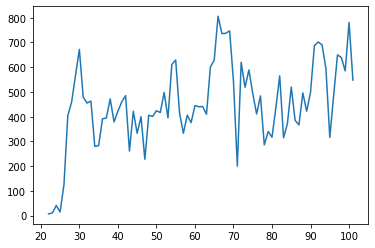

In [37]:
plt.plot(train_dataset_newMold[["y"]])

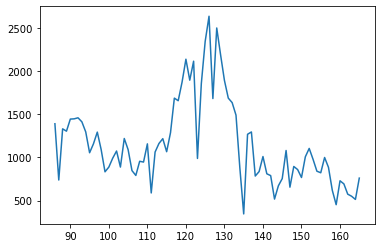

In [38]:
plt.plot(train_dataset_fixMold[["y"]])

In [ ]:
#qx_point = train_q[["ds"]].values
#qy_point = train_q[["y"]].values

In [ ]:
#plt.plot(qx_point,qy_point)

In [39]:
adf(train_dataset_newMold[["y"]])

(-4.387214338626531,
 0.0003126858314410683,
 0,
 79,
 {'1%': -3.5159766913976376,
  '5%': -2.898885703483903,
  '10%': -2.5866935058484217},
 833.2508665203316)

In [40]:
adf(train_dataset_fixMold[["y"]])

(-1.6410426079426994,
 0.4617160518438439,
 4,
 75,
 {'1%': -3.520713130074074,
  '5%': -2.9009249540740742,
  '10%': -2.5877813777777776},
 965.4653339412348)

In [41]:
lbp(train_dataset_newMold[["y"]],boxpierce=True,return_df=True,lags=14)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,34.469041,4.330852e-09,33.207979,8.281005e-09
2,50.221939,1.242924e-11,48.192443,3.428815e-11
3,56.711201,2.961821e-12,54.286017,9.750236e-12
4,57.328872,1.055431e-11,54.858494,3.478523e-11
5,57.515684,3.958911e-11,55.029358,1.287334e-10
6,57.515877,1.436322e-10,55.029532,4.572274e-10
7,57.559475,4.626707e-10,55.068345,1.445134e-09
8,57.847788,1.229986e-09,55.321498,3.823144e-09
9,58.368594,2.761601e-09,55.772439,8.675469e-09
10,58.557517,6.787340e-09,55.933716,2.112439e-08


In [42]:
lbp(train_dataset_fixMold[["y"]],boxpierce=True,return_df=True,lags=40)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,46.939840,7.319948e-12,45.222529,1.758703e-11
2,83.887489,6.082236e-19,80.367853,3.534617e-18
3,116.704890,3.953797e-25,111.184193,6.102046e-24
4,150.697337,1.443080e-31,142.689388,7.495484e-30
5,170.883738,4.726498e-35,161.152560,5.622122e-33
...,...,...,...,...
36,315.114757,2.681066e-46,267.760017,3.297583e-37
37,318.066222,2.154748e-46,269.307737,4.635832e-37
38,320.408560,2.256001e-46,270.507471,7.513808e-37
39,322.252074,2.925058e-46,271.429228,1.360490e-36


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


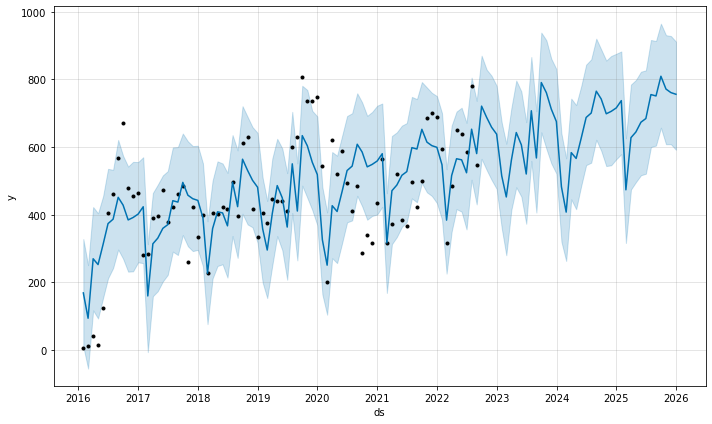

In [48]:
pt_p = Prophet()
pt_p.fit(train_dataset_newMold)
fature_p = pt_p.make_future_dataframe(periods=40,freq="M")
forecast_p = pt_p.predict(fature_p)
p_forecast = forecast_p[["ds","yhat","yhat_lower","yhat_upper"]]
figp1 = pt_p.plot(p_forecast)

In [50]:
forecast_p[-3:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
117,2025-10-31,667.781686,608.331098,930.558477,667.781399,667.781949,103.570257,103.570257,103.570257,103.570257,103.570257,103.570257,0.0,0.0,0.0,771.351943
118,2025-11-30,671.002586,608.463532,928.179047,671.002288,671.002857,89.915617,89.915617,89.915617,89.915617,89.915617,89.915617,0.0,0.0,0.0,760.918203
119,2025-12-31,674.330849,591.804498,911.589578,674.330543,674.331128,81.620177,81.620177,81.620177,81.620177,81.620177,81.620177,0.0,0.0,0.0,755.951026


In [176]:
p[-4:-1]

,ds,y
99,2022-06-30,585
100,2022-07-31,781
101,2022-08-31,548


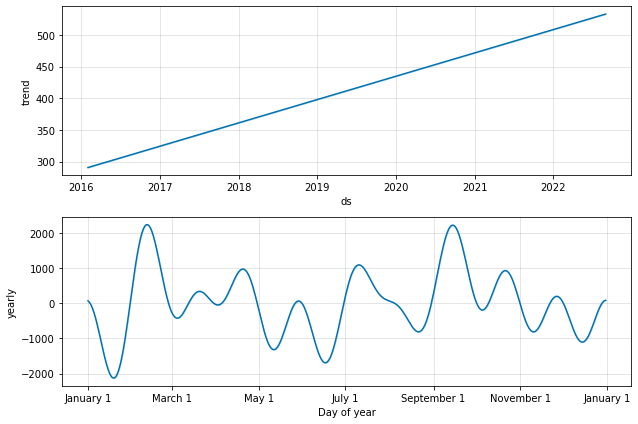

In [30]:
figp1 = pt_p.plot_components(forecast_p)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.


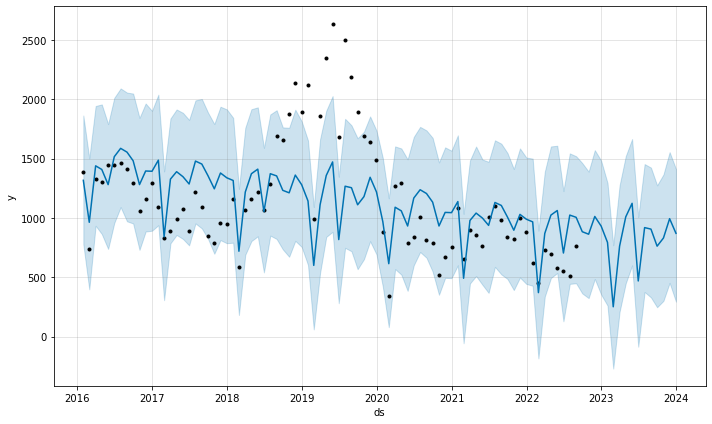

In [51]:
pt_q = Prophet( \
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=10,
    #holidays_prior_scale=5,
    changepoint_range=0.05 
    #changepoint_range=0.1 \
        )
pt_q.fit(train_dataset_fixMold)
fature_q = pt_q.make_future_dataframe(periods=16,freq="M")
forecast_q = pt_q.predict(fature_q)
q_forecast = forecast_q[["ds","yhat","yhat_lower","yhat_upper"]]
figq1 = pt_q.plot(q_forecast) 

In [179]:
q[-3:]

,ds,y
164,2022-07-31,514
165,2022-08-31,761
166,2022-09-30,161


In [52]:
forecast_q[-3:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
93,2023-10-31,769.845054,302.365536,1366.802933,769.845050,769.845057,61.530204,61.530204,61.530204,61.530204,61.530204,61.530204,0.0,0.0,0.0,831.375258
94,2023-11-30,762.685937,453.667523,1554.591971,762.685933,762.685941,231.534026,231.534026,231.534026,231.534026,231.534026,231.534026,0.0,0.0,0.0,994.219963
95,2023-12-31,755.288183,294.917831,1412.645155,755.288178,755.288188,115.345785,115.345785,115.345785,115.345785,115.345785,115.345785,0.0,0.0,0.0,870.633968


In [53]:
#合并结果
forecast_p[["ds","yhat_lower","yhat","yhat_upper"]][-48:].to_csv("NewMold_predict.csv",index=None,header=True)
forecast_q[["ds","yhat_lower","yhat","yhat_upper"]][-24:].to_csv("FixMold_predict.csv",index=None,header=True)

## 测试结束 以下为具体内容输出

In [185]:
import numpy as np

In [198]:
t = np.ceil(forecast_p[["yhat_lower","yhat","yhat_upper"]])

In [ ]:
q[-4:-1]

In [ ]:
figq2 = pt_q.plot_components(forecast_q)

In [ ]:
q_forecast.to_csv("enMold_forcast.csv")

In [ ]:
时间 = q[["ds"]]
预测值 = q[["yhat"]]

In [ ]:
plt.plot(时间,预测值)

In [ ]:
plt.plot(m[26:][["ds"]],m[26:][["y"]])